<a href="https://colab.research.google.com/github/SSingh087/Classification-of-Astrophysical-events-from-GW-signature/blob/main/Workflow_SNR_multidetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lalsuite pycbc lenstronomy

In [ ]:
!git clone https://<><>@github.com/SSingh087/test.git

In [ ]:
cd test/

In [ ]:
!python setup.py install

In [ ]:
cd ..

In [ ]:
!git clone https://<><>@github.com/SSingh087/lensGW-PyCBC-plugin.git

In [ ]:
cd lensGW-PyCBC-plugin

In [ ]:
!python setup.py install

In [ ]:
cd ..

In [1]:
from pycbc import waveform
from lgw import *
waveform.add_custom_waveform('lensed', lensed_gw_td, 'time', force=True)
hp_tilde_lensed, hc_tilde_lensed = waveform.get_td_waveform(
                approximant="lensed",
                y0 = 0.1,y1 = 0.7937005,l0 = 0.5,l1 = 0,zS = 2.0,zL = 0.5,mL=[1e3,1e3], lens_model_list = ['POINT_MASS', 'POINT_MASS'],
                mass1=300,mass2=300,delta_t=1.0/16384,f_lower=20)

/usr/local/lib/python3.7/dist-packages/lensGW-1.0.0-py3.7.egg/lensGW/utils/utils.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


Clear any .ini or .hdf file previously made
`!rm *.ini *.hdf`

if output is 

```
rm: cannot remove '*.ini': No such file or directory
rm: cannot remove '*.hdf': No such file or directory
```
then there is no file that can interrupt

Create a base injection.ini file and make changes to the parameters by changing values corresponding to those parameters.

In [52]:
!rm *.ini *.hdf

rm: cannot remove '*.hdf': No such file or directory


In [53]:
injection_config="""
[variable_params]

[static_params]
tc = 1126259462.420
approximant=lgw
;lens param
y0 = 0.1
y1 = 0.7937005
l0 = 0.5
l1 = 0
zS = 2.0
zL = 0.5
mL=[1e4,1e4]
lens_model_list = ['POINT_MASS', 'POINT_MASS']
;wave - param
mass1=800
mass2=800
spin1x=0.0
spin1y=0.0
spin1z=0.3
spin2x=0.0
spin2y=0.0
spin2z=0.4
inclination=1.23
distance=800
coa_phase=2.45
f_ref=25
f_lower=15
eccentricity=.3

;detector - config
ra = 2.2
dec = -1.25
polarization = 1.75
"""
!echo '{injection_config}' > injection.ini
!cat injection.ini


[variable_params]

[static_params]
tc = 1126259462.420
approximant=lgw
;lens param
y0 = 0.1
y1 = 0.7937005
l0 = 0.5
l1 = 0
zS = 2.0
zL = 0.5
mL=[1e4,1e4]
lens_model_list = [POINT_MASS, POINT_MASS]
;wave - param
mass1=800
mass2=800
spin1x=0.0
spin1y=0.0
spin1z=0.3
spin2x=0.0
spin2y=0.0
spin2z=0.4
inclination=1.23
distance=800
coa_phase=2.45
f_ref=25
f_lower=15
eccentricity=.3

;detector - config
ra = 2.2
dec = -1.25
polarization = 1.75



In [54]:
import configparser as ConfigParser
import numpy as np
series = np.arange(500,800,100)
mL = np.array([1e3,1e4,1e5],dtype=np.int32)#arange(1e3,1e4+1,1000)
for i in mL:
    for j in series:
        cp = ConfigParser.ConfigParser()
        cp.optionxform = str
        cp.allow_no_value=True
        cp.read('injection.ini')
        cp.set('static_params','mL','['+str(i)+','+str(i)+']')
        cp.set('static_params','mass1',str(j))
        cp.set('static_params','mass2',str(j))
        with open('injection_mL'+str(i)+'_M_'+str(j)+'.ini', 'w') as configfile:
            print("Injection .ini file created for ML = {} M1, M2 = {} ".format(i,j))
            cp.write(configfile)

Injection .ini file created for ML = 1000 M1, M2 = 500 
Injection .ini file created for ML = 1000 M1, M2 = 600 
Injection .ini file created for ML = 1000 M1, M2 = 700 
Injection .ini file created for ML = 10000 M1, M2 = 500 
Injection .ini file created for ML = 10000 M1, M2 = 600 
Injection .ini file created for ML = 10000 M1, M2 = 700 
Injection .ini file created for ML = 100000 M1, M2 = 500 
Injection .ini file created for ML = 100000 M1, M2 = 600 
Injection .ini file created for ML = 100000 M1, M2 = 700 


## for LIGO-H1

In [65]:
%%shell
for DET in H1 L1 V1 E1
do
    for ml in 1000 10000 100000 # this sis similar to C++ code 'for' loop
                                # but check for mass ranges should be same
    do
        for ((a=500;a<=700;a+=100));
        do
            case $DET in 
                H1) PSD=aLIGOAPlusDesignSensitivityT1800042
                    FLOW=15
                    ;; 
                L1) PSD=aLIGOAPlusDesignSensitivityT1800042
                    FLOW=15
                    ;; 
                V1) PSD=aLIGOAPlusDesignSensitivityT1800042
                    FLOW=15
                    ;;
                E1) PSD=EinsteinTelescopeP1600143
                    FLOW=5
                    ;;
            esac
            # declare file names
            NAME_INI="injection_mL${ml}_M_${a}.ini"
            NAME_HDF="injection_mL${ml}_M_${a}.hdf"
            STRAIN_HDF="strain_${DET}_mL${ml}_M_${a}.hdf"
            echo $NAME_INI $NAME_HDF $STRAIN_HDF
        done
    done
done

injection_mL1000_M_500.ini injection_mL1000_M_500.hdf strain_H1_mL1000_M_500.hdf
injection_mL1000_M_600.ini injection_mL1000_M_600.hdf strain_H1_mL1000_M_600.hdf
injection_mL1000_M_700.ini injection_mL1000_M_700.hdf strain_H1_mL1000_M_700.hdf
injection_mL10000_M_500.ini injection_mL10000_M_500.hdf strain_H1_mL10000_M_500.hdf
injection_mL10000_M_600.ini injection_mL10000_M_600.hdf strain_H1_mL10000_M_600.hdf
injection_mL10000_M_700.ini injection_mL10000_M_700.hdf strain_H1_mL10000_M_700.hdf
injection_mL100000_M_500.ini injection_mL100000_M_500.hdf strain_H1_mL100000_M_500.hdf
injection_mL100000_M_600.ini injection_mL100000_M_600.hdf strain_H1_mL100000_M_600.hdf
injection_mL100000_M_700.ini injection_mL100000_M_700.hdf strain_H1_mL100000_M_700.hdf
injection_mL1000_M_500.ini injection_mL1000_M_500.hdf strain_L1_mL1000_M_500.hdf
injection_mL1000_M_600.ini injection_mL1000_M_600.hdf strain_L1_mL1000_M_600.hdf
injection_mL1000_M_700.ini injection_mL1000_M_700.hdf strain_L1_mL1000_M_700.hdf
i

In [66]:
%%shell
for DET in H1 L1 V1 E1
do
    for ml in 1000 10000 100000 # this sis similar to C++ code 'for' loop
                                # but check for mass ranges should be same
    do
        for ((a=500;a<=700;a+=100));
        do
            case $DET in 
                H1) PSD=aLIGOAPlusDesignSensitivityT1800042
                    FLOW=15
                    ;; 
                L1) PSD=aLIGOAPlusDesignSensitivityT1800042
                    FLOW=15
                    ;; 
                V1) PSD=AdvVirgo
                    FLOW=15
                    ;;
                E1) PSD=EinsteinTelescopeP1600143
                    FLOW=5
                    ;;
            esac
            # declare file names
            NAME_INI="injection_mL${ml}_M_${a}.ini"
            NAME_HDF="injection_mL${ml}_M_${a}.hdf"
            STRAIN_HDF="strain_${DET}_mL${ml}_M_${a}.hdf"
            echo "-----------------For M1, M2 = $a------------------"

            #create injections files 
            pycbc_create_injections --verbose \
                        --config-files $NAME_INI \
                        --ninjections 1 \
                        --seed 123 \
                        --output-file $NAME_HDF \
                        --variable-params-section variable_params \
                        --static-params-section static_params \
                        --dist-section prior \
                        --force

            pycbc_condition_strain --sample-rate 16384\
                        --gps-start-time 1126259450\
                        --gps-end-time 1126259470\
                        --fake-strain $PSD \
                        --strain-high-pass 15\
                        --pad-data 8\
                        --low-frequency-cutoff $FLOW\
                        --injection-file $NAME_HDF\
                        --channel-name $DET:STRAIN\
                        --fake-strain-seed 44\
                        --output-strain-file $STRAIN_HDF
        done
    done
done

-----------------For M1, M2 = 500------------------
2021-02-24 05:45:40,536 Loading config file
2021-02-24 05:45:40,536 Reading configuration file
2021-02-24 05:45:40,537 Reading distributions
2021-02-24 05:45:40,538 Drawing samples
2021-02-24 05:45:40,538 Writing results
2021-02-24 05:45:42,350 Generating Fake Strain
2021-02-24 05:45:42,350 Making PSD for strain
2021-02-24 05:45:42,386 Making colored noise
2021-02-24 05:45:46,810 Highpass Filtering
2021-02-24 05:45:46,839 Resampling data
2021-02-24 05:45:46,840 Applying injections
/usr/local/lib/python3.7/dist-packages/lensGW-1.0.0-py3.7.egg/lensGW/utils/utils.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
2021-02-24 05:45:48,739 Injecting at 1126259462.42, method is lal
2021-02-24 05:45:48,749 Converting to float64
2021-02-24 05:45:48,750 Highpass Filtering
2021-02-24 05:45:48,779 Remove Padding
2021-02-24 05:45:48,780 Writing output strain to strain_H1_mL1000_M_500.hdf
2021-02-24 05:45:49,047 Done


In [72]:
import h5py
import numpy as np
from pycbc.types import TimeSeries
from pycbc.filter import resample_to_delta_t, highpass, matched_filter
from pycbc.psd import interpolate, inverse_spectrum_truncation

series = np.arange(500,800,100)
mL = np.array([1e3,1e4,1e5],dtype=np.int32)#arange(1e3,1e4+1,1000)

SNR_H1, SNR_L1, SNR_V1, SNR_E1 = [],[],[],[]
for DET in ['H1','L1','V1','E1']:
    for i in mL:
        for j in series:
            hf = h5py.File("strain_"+DET+"_mL"+str(i)+'_M_'+str(j)+".hdf",'r')
            key = DET+':STRAIN'
            strain_H1 = TimeSeries(np.array(hf.get(key)),delta_t=1/16384)
            strain_H1.start_time += 1126259450

            strain = resample_to_delta_t(highpass(strain_H1, 20.0), 1.0/2048)
            conditioned = strain_H1.crop(3,3)
            if DET is 'E1':
                low_frequency_cutoff = 5
            else :
                low_frequency_cutoff = 25
            psd = conditioned.psd(4)
            psd = interpolate(psd, conditioned.delta_f)
            psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                            low_frequency_cutoff=low_frequency_cutoff)

            waveform.add_custom_waveform('lensed', lensed_gw_td, 'time', force=True)
            hp,hc = waveform.get_td_waveform(approximant='lensed',
                    y0 = 0.1,y1 = 0.7937005,l0 = 0.5,l1 = 0,zS = 2.0,zL = 0.5,mL=[i,i],lens_model_list = ['POINT_MASS', 'POINT_MASS'],
                    mass1=j,mass2=j,spin1x=0.0,spin1y=0.0,spin1z=0.3,spin2x=0.0,spin2y=0.0,spin2z=0.4,
                    inclination=1.23,distance=800,coa_phase=2.45,f_lower=20,eccentricity=.3,delta_t=conditioned.delta_t)
            hp.resize(len(conditioned))
            template = hp.cyclic_time_shift(hp.start_time)

            snr = matched_filter(template, conditioned,psd=psd, low_frequency_cutoff=low_frequency_cutoff)
            peak = abs(snr).numpy().argmax()
            snrp = snr[peak]
            time = snr.sample_times[peak]
            if DET is 'H1':
                SNR_H1.append(abs(snrp))
            elif DET is 'L1':
                SNR_L1.append(abs(snrp))
            elif DET is 'V1':
                SNR_V1.append(abs(snrp))
            elif DET is 'E1':
                SNR_E1.append(abs(snrp)) 
            print("For {}, mL {}, M1, M2 {} at {} with SNR {}".format(DET,i,j,time, abs(snrp)))

/usr/local/lib/python3.7/dist-packages/lensGW-1.0.0-py3.7.egg/lensGW/utils/utils.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


For H1, mL 1000, M1, M2 500 at 1126259462.4190063 with SNR 59.514676489781735
For H1, mL 1000, M1, M2 600 at 1126259462.5306396 with SNR 75.94700949330196
For H1, mL 1000, M1, M2 700 at 1126259462.4398804 with SNR 166.00604626573255
For H1, mL 10000, M1, M2 500 at 1126259462.4060059 with SNR 45.685442466231635
For H1, mL 10000, M1, M2 600 at 1126259462.36969 with SNR 35.21287519052394
For H1, mL 10000, M1, M2 700 at 1126259462.4394531 with SNR 73.5699004948554
For H1, mL 100000, M1, M2 500 at 1126259462.4094238 with SNR 31.198490386225938
For H1, mL 100000, M1, M2 600 at 1126259462.4381104 with SNR 24.421564783370926
For H1, mL 100000, M1, M2 700 at 1126259462.3693848 with SNR 38.36978578886499
For L1, mL 1000, M1, M2 500 at 1126259462.3980103 with SNR 39.770122841139
For L1, mL 1000, M1, M2 600 at 1126259462.5239258 with SNR 51.890698271310036
For L1, mL 1000, M1, M2 700 at 1126259462.4331665 with SNR 117.20557728470868
For L1, mL 10000, M1, M2 500 at 1126259462.3990479 with SNR 35.49

In [73]:
SNR_H1, SNR_L1, SNR_V1, SNR_E1 = np.array(SNR_H1), np.array(SNR_L1), np.array(SNR_V1), np.array(SNR_E1)

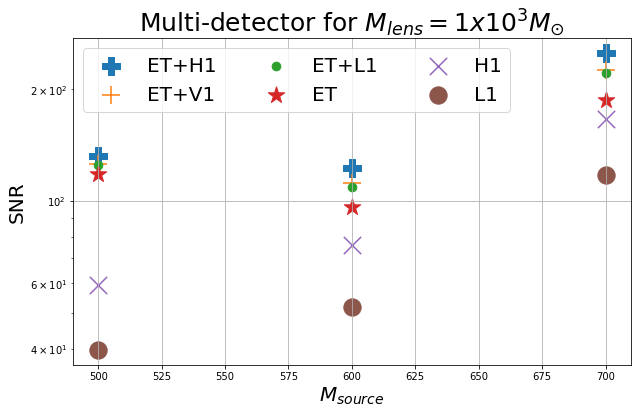

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Multi-detector for $M_{lens} = 1x10^3 M_{\odot}$",fontsize=25)
plt.xlabel("$M_{source}$",fontsize=20)
plt.ylabel("SNR",fontsize=20)
plt.scatter(series, (SNR_ET[:3]**2+SNR_H1[:3]**2)**(1/2), marker='P', s=300)
plt.scatter(series, (SNR_ET[:3]**2+SNR_V1[:3]**2)**(1/2), marker='+', s=300)
plt.scatter(series, (SNR_ET[:3]**2+SNR_L1[:3]**2)**(1/2), marker='.', s=300)
plt.scatter(series, SNR_ET[:3], marker='*', s=300)
plt.scatter(series, SNR_H1[:3], marker='x', s=300)
plt.scatter(series, SNR_L1[:3], marker='o', s=300)
plt.legend(["ET+H1","ET+V1","ET+L1","ET","H1","L1"], ncol=3,fontsize=20)
plt.yscale('log')
plt.grid()